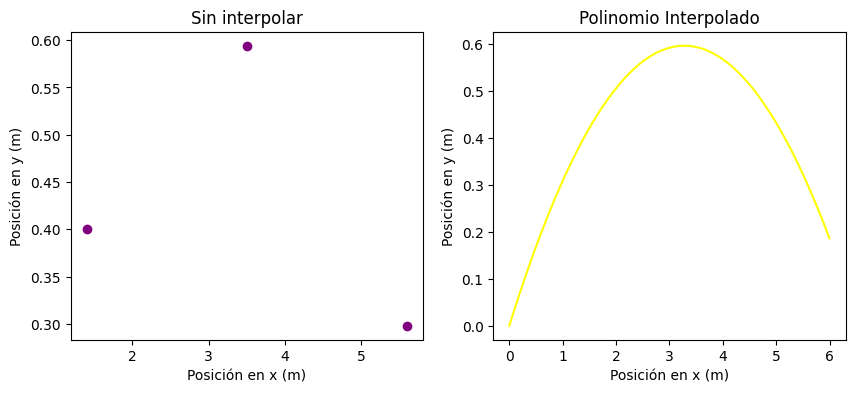

La magnitud del vector velocidad es  9.536037329972256  y su dirección es  19.658964575597402 grados


In [53]:
import numpy as np
import matplotlib.pyplot as plt

def carga_datos (archivo):
        X= []
        Y = []
        with open(archivo, 'r') as csv_file:
            next(csv_file)
            for linea in csv_file:
                datos = linea.strip().split(',')
                if len(datos) >= 2:
                    X.append(float(datos[0].strip()))  
                    Y.append(float(datos[1].strip()))
        X1=np.array(X)
        Y1=np.array(Y)
        return [X1, Y1] 

def Lagrange(x,X,i):
    
    L = 1
    
    for j in range(X.shape[0]):
        if i != j:
            L *= (x - X[j])/(X[i]-X[j])
            
    return L

def Interpolate(x,X,Y):
    
    Poly = 0
    
    for i in range(X.shape[0]):
        Poly += Lagrange(x,X,i)*Y[i]
        
    return Poly

x=np.linspace(0,6,100)
interpolacion=Interpolate(x,carga_datos("Parabolico.csv")[0],carga_datos("Parabolico.csv")[1])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(carga_datos("Parabolico.csv")[0], carga_datos("Parabolico.csv")[1], color='purple')
ax1.set_xlabel('Posición en x (m)')
ax1.set_ylabel('Posición en y (m)')
ax2.plot(x, interpolacion, color='yellow')
ax2.set_xlabel('Posición en x (m)')
ax2.set_ylabel('Posición en y (m)')
ax1.set_title('Sin interpolar')
ax2.set_title('Polinomio Interpolado')

plt.show()

def Derivadas(y,x,h=1):
    derivadas=np.array([])
    for i in range(1,len(y)-1):
        derivada=((y[i+1]-y[i-1])/(x[i+1]-x[i-1]))
        derivadas=np.append(derivadas,derivada)
        
    return derivadas
#Primero quiero hallar el valor máximo de la derivada para hallar el tiempo de vuelo#

def mayor_altura (y):
    mayor=y[0]
    for i in range(len(y)):
        if abs(y[i])>abs(mayor):
            mayor=y[i]
            indice=i 
    return indice 
def tiempo_de_vuelo (y):
    return 2*(np.sqrt((2*mayor_altura(y)-y[0])/(9.81)) )

#Una vez obtenido el tiempo de vuelo, creamos un linspace con ese valor para tener funciones x(t) y y(t)
eje_tiempo=np.linspace(0,tiempo_de_vuelo(interpolacion),100)

#Sabemos que derivando y despejando ambas funciones podemos obtener V_oSinx y V_oCosx. De este modo, con álgebra y trigonometria, obtenemos un valor para la velocidad inicial
velocidad_x=Derivadas(x,eje_tiempo)
velocidad_y=Derivadas(interpolacion,eje_tiempo)
velocidad_inicial=np.sqrt((velocidad_x[1])**2+(velocidad_y[1]-(9.81*1))**2)

#Ya con el valor de la velocidad inicial, podemos despejar el ángulo usando la funcion arctan(x) 
angulo=(np.arctan(velocidad_y[0]/velocidad_x[2]))*(180/np.pi)
#En consola se muestran los valores de la magnitud de velocidad y su dirección. Dan lo esperado
print("La magnitud del vector velocidad es ", str(velocidad_inicial), " y su dirección es ", str(angulo), "grados")
